<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithhour_recent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
rain_data09 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/09.csv',encoding='utf-8')
rain_data10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/10.csv',encoding='utf-8')
rain_data11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/11.csv',encoding='utf-8')
rain_data12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/12.csv',encoding='utf-8')
rain_data13 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/13.csv',encoding='utf-8')
rain_data14 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/14.csv',encoding='utf-8')
rain_data15 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/15.csv',encoding='utf-8')
rain_data16 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/16.csv',encoding='utf-8')
rain_data17 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/17.csv',encoding='utf-8')
rain_data18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/18.csv',encoding='utf-8')
rain_data19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/19.csv',encoding='utf-8')
rain_data20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/20.csv',encoding='utf-8')
rain_data21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/21.csv',encoding='utf-8')
rain_data22 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/22.csv',encoding='utf-8')
rain_data23 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/23.csv',encoding='utf-8')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/data.csv',encoding='utf-8')

In [3]:
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, how='outer'),[rain_data09, rain_data10, rain_data11, rain_data12, rain_data13,rain_data14, rain_data15, rain_data16, rain_data17, rain_data18,rain_data19, rain_data20, rain_data21, rain_data22, rain_data23])
date = []

for rain_date in rain_data['date']:
  if rain_date not in date:
    date.append(rain_date)


In [4]:
data['date'] = date

data = data.fillna(0)
# data.set_index("date")
data.index = data['date']
print(data)

                  date  0:00  1:00  2:00  3:00  4:00  5:00  6:00  7:00  8:00  \
date                                                                           
2009-01-16  2009-01-16     0     0     0     0     0     0     0     0     0   
2009-01-18  2009-01-18     0     0     0     0     0     0     0     0     0   
2009-01-19  2009-01-19     0     0     0     0     0     0     0     0     0   
2009-01-22  2009-01-22     0     0     0     0     0     0     0     0     0   
2009-01-23  2009-01-23     0     0     0     0     0     0     0     0     0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-20  2023-12-20     0     0     0     0     0     0     0     0     0   
2023-12-24  2023-12-24     0     0     0     0     0     0     0     0     0   
2023-12-25  2023-12-25     0     0     0     0     0     0     0     0     0   
2023-12-30  2023-12-30     0     0     0     0     0     0     0     0     0   
2023-12-31  2023-12-31     0     0     0

In [5]:
for l in range(len(rain_data)):
  date_value = rain_data['date'][l]
  hour_value = rain_data['hour'][l]
  code_value = rain_data['code'][l]
  rain_value = rain_data['rain'][l]
  # print(date_value, hour_value, code_value, rain_value)
  rain = data.loc[date_value][hour_value]
  if code_value == 100:
    rain_value = rain_value * 0.114
  elif code_value == 101 :
    rain_value = rain_value * 0.128
  elif code_value == 90:
    rain_value = rain_value * 0.094
  elif code_value == 211:
    rain_value = rain_value * 0.668
  rain = rain + rain_value
  data.loc[date_value, hour_value] = rain

print(data)

                  date    0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  \
date                                                                           
2009-01-16  2009-01-16  0.0000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   
2009-01-18  2009-01-18  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-19  2009-01-19  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-22  2009-01-22  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-23  2009-01-23  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
...                ...     ...   ...   ...     ...   ...   ...     ...   ...   
2023-12-20  2023-12-20  0.0668   0.0   0.0  0.2800   0.0   0.0  0.0000   0.0   
2023-12-24  2023-12-24  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2023-12-25  2023-12-25  0.0000   0.0   0.0  0.1128   0.0   0.0  0.1128   0.0   
2023-12-30  2023-12-30  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2023-12-31  2023-12-31  1.7300   0.0   0

In [6]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/dam_flow.csv',encoding='utf-8')
dam_flow.set_index("date", inplace = True)
print(dam_flow)

            dam flow(㎥/s)
date                     
2009-01-01          0.000
2009-01-02          0.825
2009-01-03          3.904
2009-01-04          0.000
2009-01-05          0.000
...                   ...
2023-12-27         25.873
2023-12-28         21.186
2023-12-29         20.887
2023-12-30         29.183
2023-12-31         25.803

[5478 rows x 1 columns]


In [7]:
from functools import reduce

date_index = data.index
dam_value = dam_flow.loc[date_index]
print(dam_value)

data.rename(columns = {'date':'Date'}, inplace=True)
data = reduce(lambda x,y : pd.merge(x,y, on='date', how='outer'), [data, dam_value])

            dam flow(㎥/s)
date                     
2009-01-16          0.000
2009-01-18          0.000
2009-01-19          2.688
2009-01-22          0.957
2009-01-23          0.797
...                   ...
2023-12-20         42.639
2023-12-24         24.665
2023-12-25         25.785
2023-12-30         29.183
2023-12-31         25.803

[2977 rows x 1 columns]


In [8]:
data = data.drop(['dam_flow'], axis=1)
print(data)

                  Date    0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  \
date                                                                           
2009-01-16  2009-01-16  0.0000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   
2009-01-18  2009-01-18  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-19  2009-01-19  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-22  2009-01-22  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-23  2009-01-23  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
...                ...     ...   ...   ...     ...   ...   ...     ...   ...   
2023-12-20  2023-12-20  0.0668   0.0   0.0  0.2800   0.0   0.0  0.0000   0.0   
2023-12-24  2023-12-24  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2023-12-25  2023-12-25  0.0000   0.0   0.0  0.1128   0.0   0.0  0.1128   0.0   
2023-12-30  2023-12-30  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2023-12-31  2023-12-31  1.7300   0.0   0

<Axes: xlabel='date'>

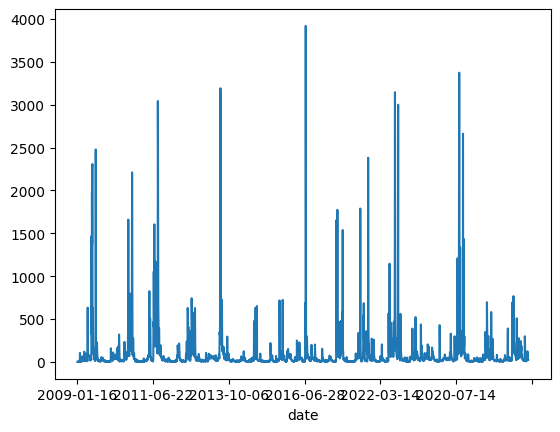

In [9]:
damflow = data['dam flow(㎥/s)']

damflow.plot()

In [10]:
print(max(data['dam flow(㎥/s)']))

3918.5


In [11]:
data['Y'] = data['dam flow(㎥/s)']
data = data.dropna()

train = data[data['Date']<'2018-01-01']
valid = data[data['Date']>='2018-01-01']
valid = valid[valid['Date']<'2022-01-01']
test = data[data['Date']>='2022-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['Date', 'Y'], axis = 1), train['Y']
# trainX = trainX.to_numpy()
# trainY = trainY.to_numpy()
# trainX = trainX.reshape(trainX.shape[0], trainX.shape[1],1)

validX, validY = valid.drop(['Date', 'Y'], axis = 1), valid['Y']
# validX = validX.to_numpy()
# validY = validY.to_numpy()
# validX = validX.reshape(validX.shape[0], validX.shape[1],1)

testX, testY = test.drop(['Date','Y'], axis = 1), test['Y']
# testX = testX.to_numpy()
# testY = testY.to_numpy()
# testX = testX.reshape(testX.shape[0], testX.shape[1],1)


train set :  1814 
 valid set :  773 
 test set :  390 



In [12]:
print(trainX.shape, trainY.shape)

print(trainX)

(1814, 25) (1814,)
              0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  8:00  \
date                                                                     
2009-01-16  0.0000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   0.0   
2009-01-18  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   0.0   
2009-01-19  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   0.0   
2009-01-22  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   0.0   
2009-01-23  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   0.0   
...            ...   ...   ...     ...   ...   ...     ...   ...   ...   
2017-12-21  0.0128   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   0.0   
2017-12-23  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   0.0   
2017-12-24  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   0.0   
2017-12-30  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   0.0   
2017-12-31  0.8910   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   0.0   

              9:00

In [13]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

modelnew = Sequential()

modelnew.add(LSTM(64, input_shape = (25,1)))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(8, 'relu'))
modelnew.add(Dense(8))
modelnew.add(Dense(1))

modelnew.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 40)                2600      
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 8)                 328       
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 21545 (

In [14]:
cp1 = ModelCheckpoint('modelnew/', save_best_only=True)
modelnew.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
modelnew.fit(trainX, trainY, validation_data = (validX, validY), batch_size = 10, epochs=50, callbacks=[cp1])

Epoch 1/50
182/182 [==============================] - 11s 39ms/step - loss: 78654.9922 - root_mean_squared_error: 280.4550 - val_loss: 73459.0000 - val_root_mean_squared_error: 271.0332
Epoch 2/50
182/182 [==============================] - 8s 47ms/step - loss: 77704.6406 - root_mean_squared_error: 278.7555 - val_loss: 71119.7344 - val_root_mean_squared_error: 266.6828
Epoch 3/50
182/182 [==============================] - 8s 44ms/step - loss: 73503.3281 - root_mean_squared_error: 271.1150 - val_loss: 65007.4570 - val_root_mean_squared_error: 254.9656
Epoch 4/50
182/182 [==============================] - 10s 53ms/step - loss: 66423.5703 - root_mean_squared_error: 257.7277 - val_loss: 57795.1875 - val_root_mean_squared_error: 240.4063
Epoch 5/50
182/182 [==============================] - 8s 43ms/step - loss: 58154.4570 - root_mean_squared_error: 241.1524 - val_loss: 50078.9688 - val_root_mean_squared_error: 223.7833
Epoch 6/50
182/182 [==============================] - 6s 34ms/step - loss

In [15]:
train_score = modelnew.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

13/13 [==============================] - 0s 8ms/step - loss: 29.5769 - root_mean_squared_error: 5.4385
Train Score: 29.58 MSE (5.44 RMSE)


In [16]:
# from tensorflow.keras.models import load_model
# model = load_model('model/')

train_predictions = modelnew.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

57/57 [==============================] - 1s 5ms/step


,Train Predictions,Actuals
date,,
2009-01-16,1.512348,0.000
2009-01-18,1.512232,0.000
2009-01-19,2.854520,2.688
2009-01-22,1.899669,0.957
2009-01-23,1.833387,0.797
...,...,...
2017-12-21,1.512444,0.000
2017-12-23,5.279475,5.522
2017-12-24,10.357882,11.366


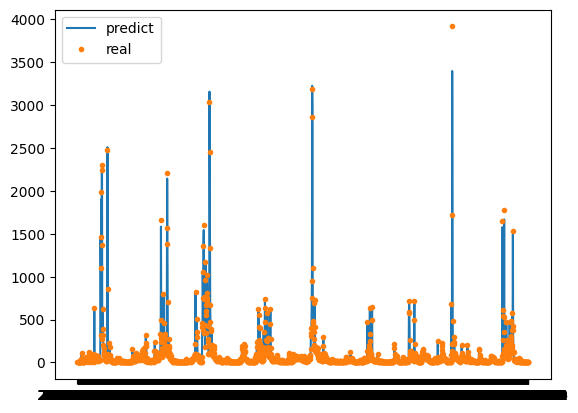

In [31]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:], alpha = 0.4)
plt.plot(train_results['Actuals'][:],'.')

plt.legend(['predict','real'])

In [18]:
val_predictions = modelnew.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

25/25 [==============================] - 0s 5ms/step


,Val Predictions,Actuals
date,,
2018-01-08,1.511367,0.000
2018-01-09,3.433190,3.462
2018-01-15,4.627646,4.869
2018-01-17,1.512442,0.000
2018-01-20,1.513667,0.003
...,...,...
2019-12-21,8.368983,8.996
2019-12-23,8.555861,9.231
2019-12-26,3.835679,4.005


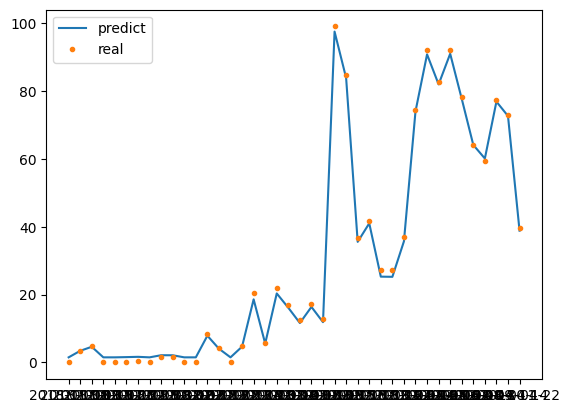

In [32]:
plt.plot(val_results['Val Predictions'][:40])
plt.plot(val_results['Actuals'][:40],'.')

plt.legend(['predict','real'])

In [20]:
test_predictions = modelnew.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

13/13 [==============================] - 0s 5ms/step


,Test Predictions,Actuals
date,,
2022-01-02,2.527955,2.260
2022-01-03,2.608344,2.367
2022-01-04,13.297540,14.116
2022-01-09,8.098005,8.661
2022-01-10,3.062530,2.963
...,...,...
2023-12-20,42.067230,42.639
2023-12-24,22.893164,24.665
2023-12-25,23.899969,25.785


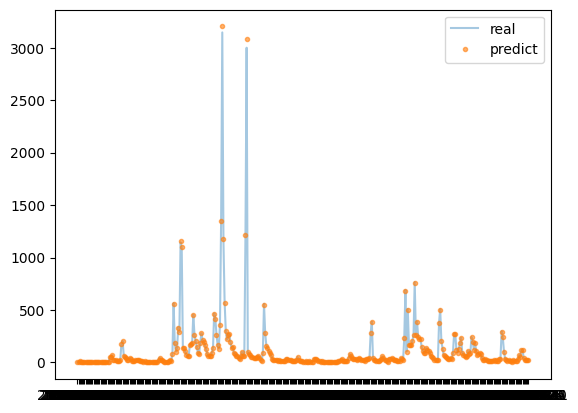

In [33]:
plt.plot(test_results['Actuals'][:], alpha=0.4)
plt.plot(test_results['Test Predictions'][:],'.',alpha = 0.6)

plt.legend(['real', 'predict'])

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY, test_predictions))
rsquared_score = r2_score(testY, test_predictions)
print('R^2 Score : %f' %(rsquared_score))
print('RMSE : %.2f' %(rmse))

R^2 Score : 0.999596
RMSE : 5.44


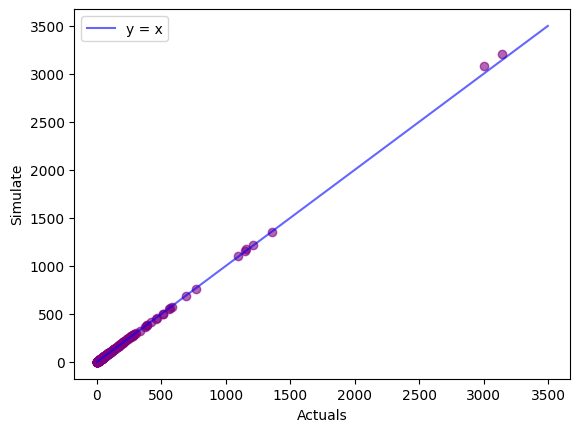

In [30]:
x = np.arange(0,3500)
y = x
plt.scatter(test_results['Actuals'][:], test_results['Test Predictions'][:], color = 'purple', alpha = 0.6)
plt.plot(x,y, color = 'blue', alpha = 0.6, label = 'y = x')
plt.xlabel('Actuals')
plt.ylabel('Simulate')

plt.legend()
plt.show()